# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
import pandas as pd


## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

In [5]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [6]:
df.Brewery.value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [7]:
df.ABV.value_counts().head(20)

ABV
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
5.10%     62
5.30%     60
4.90%     59
6.20%     59
8.00%     57
4.70%     57
6.80%     52
5.70%     52
5.40%     50
7.50%     43
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [8]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [9]:
df['ABV'] = df['ABV'].str.replace('%', '', regex=True)

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df['ABV'] = pd.to_numeric(df['ABV'])
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [11]:
df['ABV'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `isnull()`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [12]:
df['ABV'].isnull().sum()

68

In [13]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

## What are the top 10 cities in the US for canned craft beer?

In [14]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [15]:
Brooklyn = df.query("Location == 'Brooklyn, NY'") 
Brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [16]:
Brooklyn.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(10)

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        5
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [37]:
f_df = df[['Brewery', 'Beer', 'Style']]
sixpoint_beers = f_df[f_df['Brewery'] == 'Sixpoint Craft Ales']
styles = sixpoint_beers['Style'].value_counts().head(5)
styles

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [18]:
df['State'] = df['Location'].str.split(', ').str[1]

### Now *count* all of the breweries in New York state

In [19]:
clean = df.dropna(subset=['State'])
ny_breweries = clean[clean['State'].str.contains('NY', case=False, na=False)]
number = ny_breweries['Brewery'].nunique()
number

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [40]:
ipas=df[df['Style'].str.contains("IPA.*", na=False)]
ipa_style_counts = ipas['Style'].value_counts()
ipa_style_counts

Style
American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: count, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [43]:
df.IBUs.describe() 

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

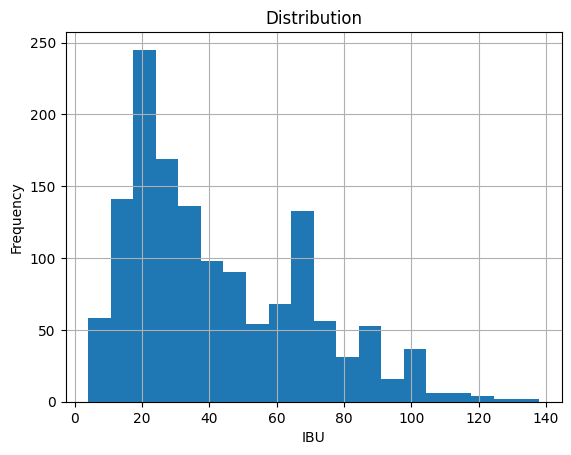

In [48]:
import matplotlib.pyplot as plt 
df['IBUs'].hist(bins=20)
plt.title('Distribution')
plt.xlabel('IBU')
plt.ylabel('Frequency')
plt.show()

## List all of the beers with IBUs below the 25th percentile

In [57]:
percentile = df['IBUs'].quantile(0.25)
low = df[df['IBUs'] < percentile]
low

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [69]:
median_ibus = df.groupby('Style')['IBUs'].median().sort_values(ascending=False)
median_ibus

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

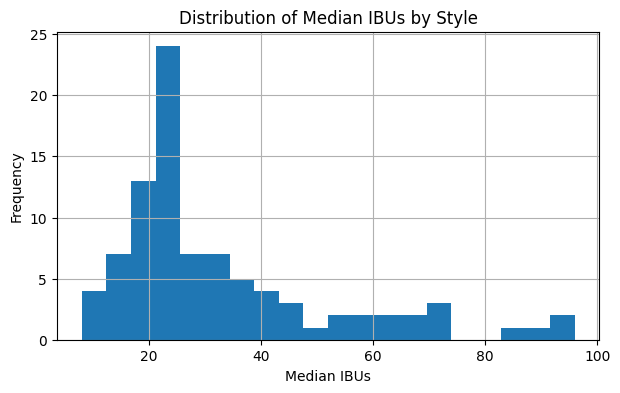

In [89]:
plt.figure(figsize=(7, 4))
median_ibus.hist(bins=20)  
plt.title('Distribution of Median IBUs by Style')
plt.xlabel('Median IBUs')
plt.ylabel('Frequency')
plt.show()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

wheat_beer_styles = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']
wheat_beers = df[df['Style'].isin(wheat_beer_styles)]
average_ibu = wheat_beers['IBUs'].mean()




In [85]:
wheat_beer = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']
wheat_beers_all = df[df['Style'].isin(wheat_beer)]
average = wheat_beers_all['IBUs'].mean()
average

18.982142857142858

## Draw a histogram of the IBUs of those beers

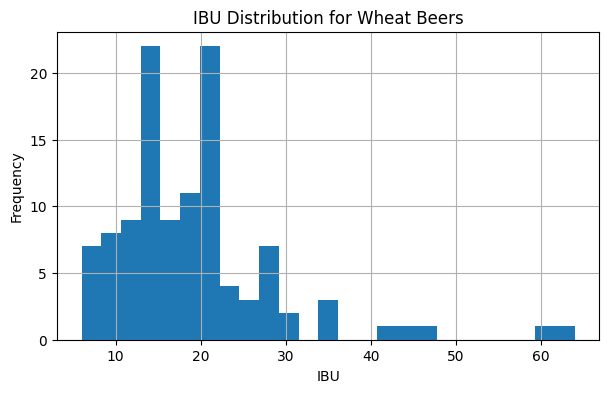

In [90]:
plt.figure(figsize=(7, 4))
wheat_beers_all['IBUs'].hist(bins=25)  
plt.title('IBU Distribution for Wheat Beers')
plt.xlabel('IBU')
plt.ylabel('Frequency')
plt.show()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [101]:
ipas=df[df['Style'].str.contains("IPA.*", na=False)]
average_IBU = ipas['IBUs'].mean()
average_IBU

71.94897959183673

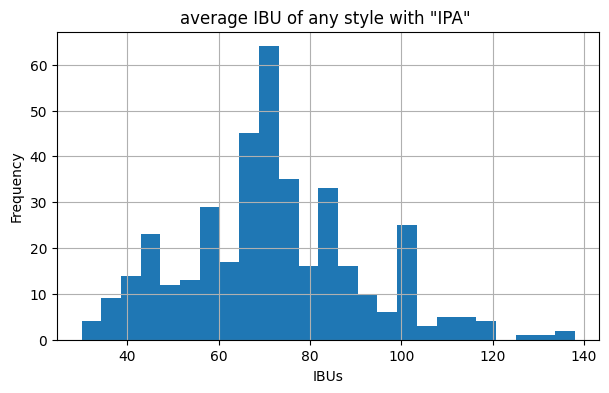

In [104]:
plt.figure(figsize=(7, 4))
ipas['IBUs'].hist(bins=25)  
plt.title('average IBU of any style with "IPA" ')
plt.xlabel('IBUs')
plt.ylabel('Frequency')
plt.show()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

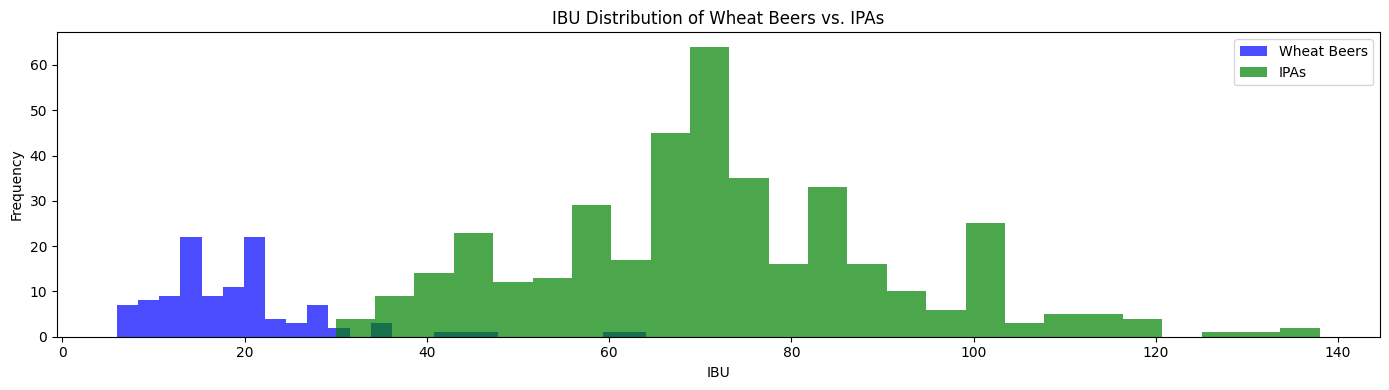

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 4))  # Create a single subplot
ax.hist(wheat_beers_all['IBUs'].dropna(), bins=25, color='blue', alpha=0.7, label='Wheat Beers')
ax.hist(ipas['IBUs'].dropna(), bins=25, color='green', alpha=0.7, label='IPAs')

ax.set_xlabel('IBU')
ax.set_ylabel('Frequency')
ax.set_title('IBU Distribution of Wheat Beers vs. IPAs')

ax.legend()

plt.tight_layout()



## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

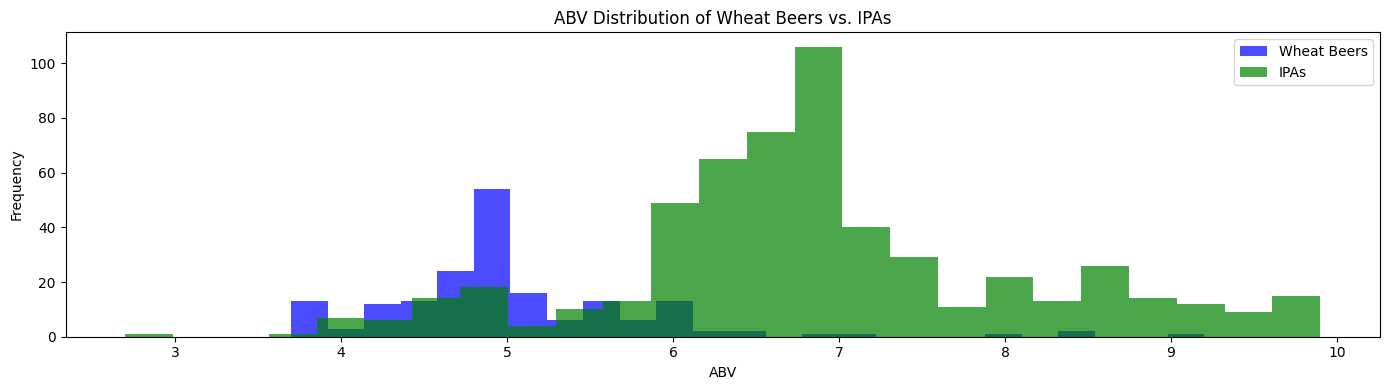

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 4))  # Create a single subplot
ax.hist(wheat_beers_all['ABV'].dropna(), bins=25, color='blue', alpha=0.7, label='Wheat Beers')
ax.hist(ipas['ABV'].dropna(), bins=25, color='green', alpha=0.7, label='IPAs')  # Use 'ABV' for IPAs

ax.set_xlabel('ABV')
ax.set_ylabel('Frequency')
ax.set_title('ABV Distribution of Wheat Beers vs. IPAs')

ax.legend()

plt.tight_layout()



## Good work!